## 人脸识别模型（face_recoginition）-快速使用指南
* 1、项目地址：https://github.com/ageitgey/face_recognition
* 2、windows安装指南：https://github.com/ageitgey/face_recognition/issues/175
    * 安装命令：pip install face-recognition
* 3、应用例子：
    * 1）定位图像中的人脸</br>
    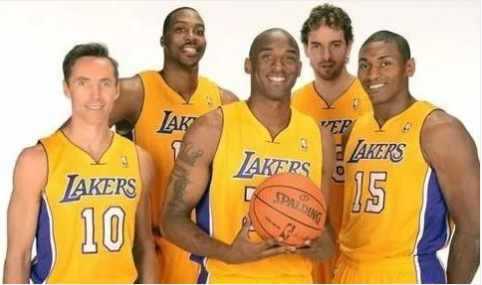
    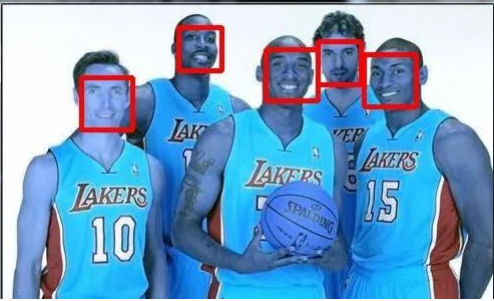
    * 2）切割图像中的每个人脸保存本地</br>
    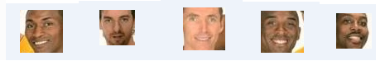
    * 3）将图像中的每个人脸编码成一个128维的向量
    * 4）输入两张人脸图像，判断是否是同一个人</br>
    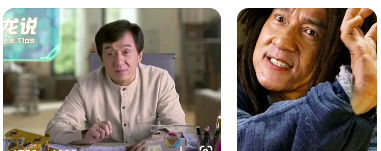
    * 5）脸部关键点识别和标注</br>
    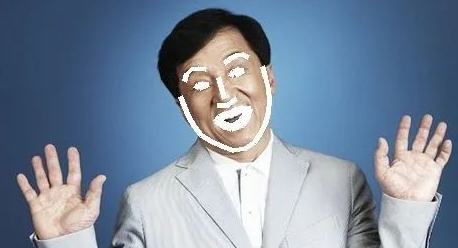
    * 6）根据标注再加工</br>
    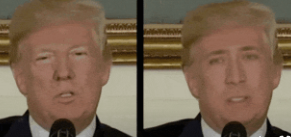
    * 7）构建自己的人脸识别应用</br>
    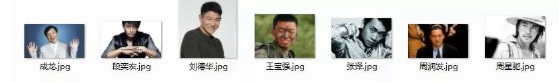
    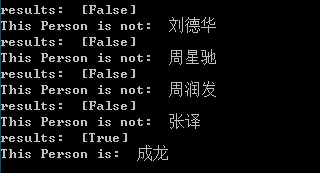
* 参考出处：https://yishuihancheng.blog.csdn.net/article/details/102831117

In [ ]:
# 1）定位图像中的人脸
import face_recognition
def demoFunc():
    '''
    在一张包含人脸的图片中圈出来人脸
    '''
    image = face_recognition.load_image_file("test.jpg")
    face_locations = face_recognition.face_locations(image)
    for one in face_locations:   
        y0, x1, y1, x0=one
        cv2.rectangle(image, pt1=(x0, y0), pt2=(x1, y1), color=(0, 0, 255), thickness=3)
    cv2.imshow('aaa', image)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()

In [ ]:
# 2）切割图像中的每个人脸保存本地
def demoFunc():
    '''
    图片中人脸截图保存
    '''
    img = cv2.imread("test.jpg")
    image = face_recognition.load_image_file("test.jpg")
    face_locations = face_recognition.face_locations(image)  #(top, right, bottom, left)
    for i in range(len(face_locations)):
        y0, x1, y1, x0 = face_locations[i]
        cropped = img.crop((x0,y0,x1,y1))  # (left, upper, right, lower)  左上角  右下角
        cropped.save(str(i)+"_.jpg")
        cropped.show()

In [ ]:
# 3）将图像中的每个人脸编码成一个128维的向量
def demoFunc():
    '''
    将图片中的每张人脸编码成一个128维长度的向量
    '''
    image = face_recognition.load_image_file("cl.jpg")
    face_locations = face_recognition.face_locations(image)  #(top, right, bottom, left) 
    face_encodings = face_recognition.face_encodings(image, face_locations)  #将单个人脸数据转化为一个128维的向量
    for one in face_encodings:
        print('one: ',one)

In [ ]:
# 4）输入两张人脸图像，判断是否是同一个人
def demoFunc(one_pic='c1.jpg',two_pic='c2.jpg'):
    '''
    给定两张图片，判断是否是同一个人
    '''
    chenglong = face_recognition.load_image_file(one_pic)
    unknown_image = face_recognition.load_image_file(two_pic)
    biden_encoding = face_recognition.face_encodings(chenglong)[0]
    unknown_encoding = face_recognition.face_encodings(unknown_image)[0]
    results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
    print('results: ',results)
    return results[0]

In [ ]:
# 5）脸部关键点识别和标注
from PIL import Image, ImageDraw
def demoFunc(pic_path='cl.jpg'):
    '''
    脸部关键点识别、标注
    '''
    image = face_recognition.load_image_file(pic_path)
    face_landmarks_list = face_recognition.face_landmarks(image)
    print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))
    pil_image = Image.fromarray(image) # array到image的转换
    d = ImageDraw.Draw(pil_image)
    for face_landmarks in face_landmarks_list:
        for facial_feature in face_landmarks.keys():
            print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=5)
    pil_image.show()

In [ ]:
# 6）根据标注再加工
from PIL import Image, ImageDraw
def demoFunc(pic_path="haiwang.jpg"):
    '''
    再加工
    '''
    image = face_recognition.load_image_file(pic_path)
    face_landmarks_list = face_recognition.face_landmarks(image)
    pil_image = Image.fromarray(image)
    for face_landmarks in face_landmarks_list:
        demo = ImageDraw.Draw(pil_image, 'RGBA')
        demo.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
        demo.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
        demo.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=2)
        demo.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=2)
        demo.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
        demo.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
        demo.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=2)
        demo.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=2)
        demo.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
        demo.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))
        demo.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=2)
        demo.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=2)
        pil_image.show()

In [ ]:
# 7）构建自己的人脸识别应用
def faceRecognitionDemo(picDir='data/', test_pic='test.png'):
    '''
    基于 face_recognition 构建人脸识别模块
    '''
    pic_list=os.listdir(picDir)
    for one_pic in pic_list:
        one_pic_path=picDir+one_pic
        one_res=demo6(one_pic=one_pic_path,two_pic=test_pic)
        one_name=one_pic.split('.')[0].strip()
        if one_res:
            print('This Person is: ', one_name)
            break
        else:
            print('This Person is not: ', one_name)